In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ball_by_ball  = pd.read_csv(r'ball_by_ball2.csv')
matches  = pd.read_csv(r'matches2.csv')


In [3]:
ball_by_ball

id  inning  over  ball      batsman  non_striker  \
0        335982       1     6     5   RT Ponting  BB McCullum   
1        335982       1     6     6  BB McCullum   RT Ponting   
2        335982       1     7     1  BB McCullum   RT Ponting   
3        335982       1     7     2  BB McCullum   RT Ponting   
4        335982       1     7     3   RT Ponting  BB McCullum   
...         ...     ...   ...   ...          ...          ...   
193271  1237181       1    12     5      RR Pant      SS Iyer   
193272  1237181       1    12     6      RR Pant      SS Iyer   
193273  1237181       1    13     1      RR Pant      SS Iyer   
193274  1237181       1    13     2      RR Pant      SS Iyer   
193275  1237181       1    13     3      SS Iyer      RR Pant   

                 bowler  batsman_runs  extra_runs  total_runs  non_boundary  \
0             AA Noffke             1           0           1             0   
1             AA Noffke             1           0           1             0   
2                Z Khan             0           0           0             0   
3                Z Khan             1           0           1             0   
4                Z Khan             1           0           1             0   
...                 ...           ...         ...         ...           ...   
193271  NM Coulter-Nile             0           0           0             0   
193272  NM Coulter-Nile             1           0           1             0   
193273        KH Pandya             0           1           1             0   
193274        KH Pandya             1           0           1             0   
193275        KH Pandya             1           0           1             0   

        is_wicket           batting_team                 bowling_team  
0               0  Kolkata Knight Riders  Royal Challengers Bangalore  
1               0  Kolkata Knight Riders  Royal Challengers Bangalore  
2               0  Kolkata Knight Riders  Royal Challengers Bangalore  
3               0  Kolkata Knight Riders  Royal Challengers Bangalore  
4               0  Kolkata Knight Riders  Royal Challengers Bangalore  
...           ...                    ...                          ...  
193271          0         Delhi Capitals               Mumbai Indians  
193272          0         Delhi Capitals               Mumbai Indians  
193273          0         Delhi Capitals               Mumbai Indians  
193274          0         Delhi Capitals               Mumbai Indians  
193275          0         Delhi Capitals               Mumbai Indians  

[193276 rows x 14 columns]

In [4]:
matches.head()

id        city        date player_of_match  \
0  335982   Bangalore  2008-04-18     BB McCullum   
1  335983  Chandigarh  2008-04-19      MEK Hussey   
2  335984       Delhi  2008-04-19     MF Maharoof   
3  335985      Mumbai  2008-04-20      MV Boucher   
4  335986     Kolkata  2008-04-20       DJ Hussey   

                                        venue  neutral_venue  \
0                       M Chinnaswamy Stadium              0   
1  Punjab Cricket Association Stadium, Mohali              0   
2                            Feroz Shah Kotla              0   
3                            Wankhede Stadium              0   
4                                Eden Gardens              0   

                         team1                        team2  \
0  Royal Challengers Bangalore        Kolkata Knight Riders   
1              Kings XI Punjab          Chennai Super Kings   
2             Delhi Daredevils             Rajasthan Royals   
3               Mumbai Indians  Royal Challengers Bangalore   
4        Kolkata Knight Riders              Deccan Chargers   

                   toss_winner toss_decision                       winner  \
0  Royal Challengers Bangalore         field        Kolkata Knight Riders   
1          Chennai Super Kings           bat          Chennai Super Kings   
2             Rajasthan Royals           bat             Delhi Daredevils   
3               Mumbai Indians           bat  Royal Challengers Bangalore   
4              Deccan Chargers           bat        Kolkata Knight Riders   

    result  result_margin eliminator    umpire1         umpire2  
0     runs          140.0          N  Asad Rauf     RE Koertzen  
1     runs           33.0          N  MR Benson      SL Shastri  
2  wickets            9.0          N  Aleem Dar  GA Pratapkumar  
3  wickets            5.0          N   SJ Davis       DJ Harper  
4  wickets            5.0          N  BF Bowden     K Hariharan

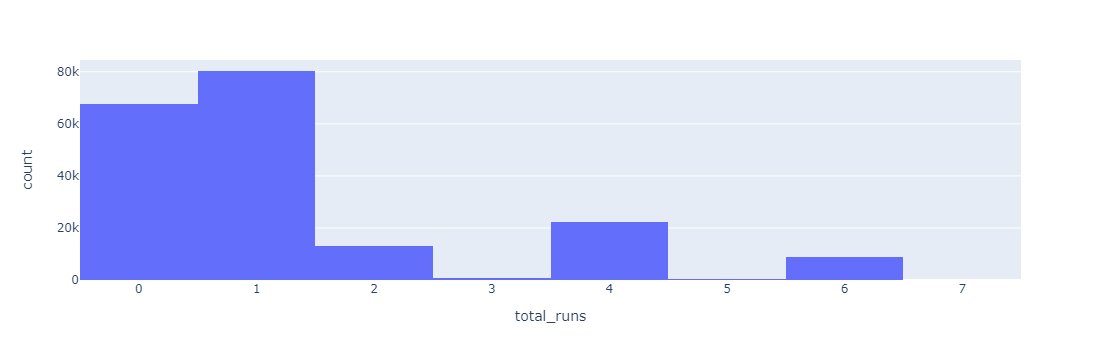

In [36]:
fig = px.histogram(ball_by_ball, x='total_runs')
fig.show()


### Insights

1. **Mode of Scoring:** The most common number of runs scored on a ball is 1. This suggests that singles are the most frequent scoring shot in IPL matches, which is always evident in cricket.

2. **Scoring Frequency:** There is a significant drop in frequency as the number of runs per ball increases, with '0' (dots) being the second most common outcome. This indicates that dot balls are also a common occurrence, underscoring the importance of bowling in T20 cricket.

3. **Rare Outcomes:** The occurrences of high-scoring shots like boundaries (4 runs) and sixes (6 runs) are less frequent, which is expected in the T20 format. However, they are still significant contributors to the total score in a match.

4. **Absence of Threes and Fives:** Runs scored in multiples of three and five are rare. This can be due to the size of the grounds or the aggressive field settings in the T20 format, where it's harder to run threes, and fives are typically the result of overthrows, which are uncommon.

5. **Seven Runs Per Ball:** The presence of a bar for '7' runs suggests that there might have been instances where extra runs were scored due to penalties or overthrows, although these are extremely rare events.

### In matches, DataFrame, 'winner' is the column of interest

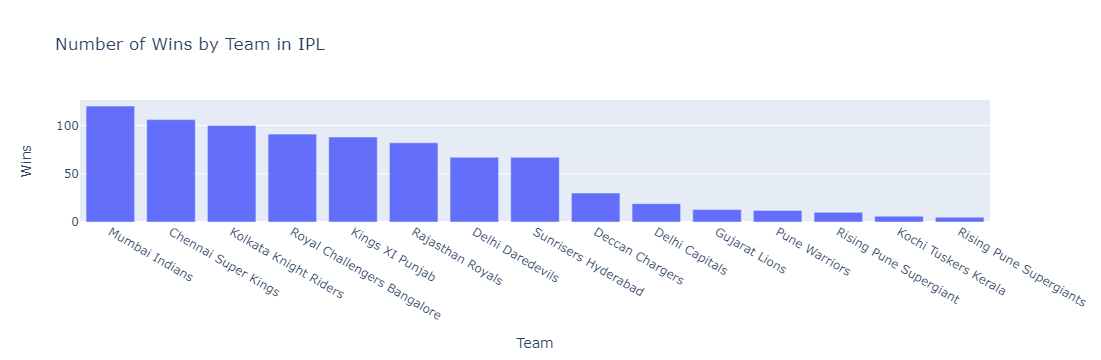

In [41]:

winner_counts = matches['winner'].value_counts().reset_index()
winner_counts.columns = ['Team', 'Wins']  # Rename columns for clarity

# Now use plotly express to create the bar chart
fig = px.bar(winner_counts, x='Team', y='Wins', title='Number of Wins by Team in IPL')
fig.show()


## Insights

1. **Dominant Teams:** Mumbai Indians and Chennai Super Kings have the highest number of wins, indicating their dominance in the league over the years. These teams have been consistently successful, likely due to a combination of strong leadership, a core group of players, and effective team strategies.

2. **Competitive Balance:** There is a noticeable decrease in wins as we move from left to right, showing a competitive imbalance where some teams have been significantly more successful than others.

3. **Team Performance:** Teams such as Kolkata Knight Riders and Royal Challengers Bangalore have a moderate number of wins, suggesting that they are competitive but not as dominant as the leading teams.

4. **Challenges for Newer Teams:** Teams with fewer wins, such as Gujarat Lions, Pune Warriors, and Kochi Tuskers Kerala, might be newer or might have had fewer seasons to play in, which could explain the lower number of wins. They might also have faced challenges in building a strong team or may have been less successful in their strategies.



### Scatter plot of runs vs wickets

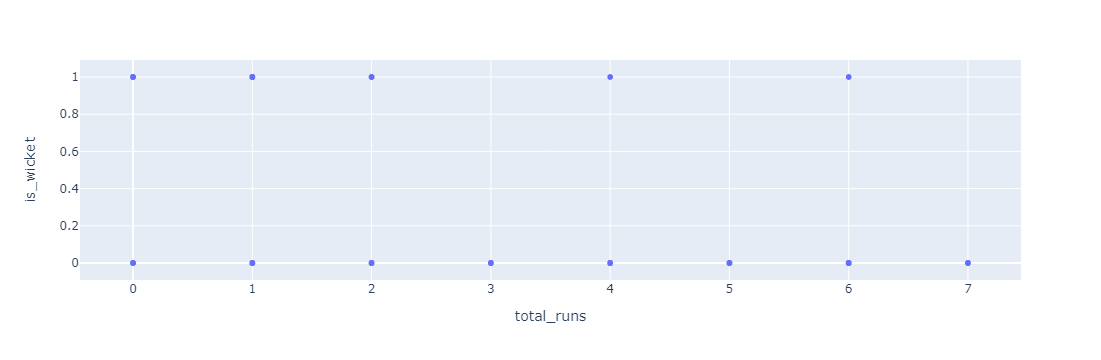

In [42]:

fig = px.scatter(ball_by_ball, x='total_runs', y='is_wicket')
fig.show()


## Insights

1. **No Clear Correlation:** The scatter plot doesn't indicate a clear correlation between the number of runs scored on a ball and the likelihood of a wicket falling. The points are spread horizontally across each run value without a clear pattern of increase or decrease in wicket frequency.

2. **Data Distribution:** Most data points for wickets are aligned at the same level (either 0 or 1), which suggests that is_wicket is a categorical variable indicating whether a wicket was taken on that delivery or not. This binary nature means that, for any number of runs scored, a wicket may or may not have fallen.

33. **Scoring Shots:** There are scoring shots for all run values from 0 to 7, which shows that it's possible to score any number of runs from a single delivery, although it's not clear how often each scoring shot occurs without a corresponding frequency distribution.

### Box plot of result_margin by winner

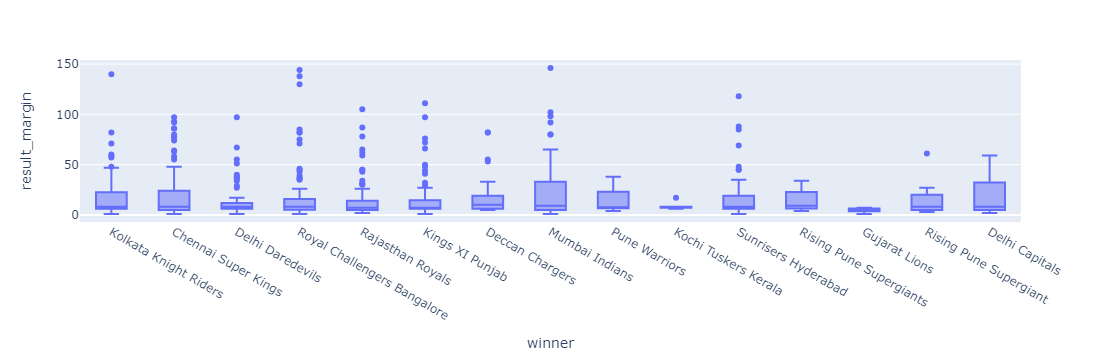

In [19]:

fig = px.box(matches, x='winner', y='result_margin')
fig.show()

## Insights

1. **Variability in Victory Margins:** The length of the boxes represents the interquartile range (IQR) of victory margins for each team. A longer box indicates greater variability in how much a team wins by, while a shorter box indicates more consistency in victory margins.

2. **Median Victory Margin:** The line in the middle of each box shows the median victory margin for each team. Teams with a higher median line tend to win by larger margins on average.

3. **Outliers:** The dots above the boxes represent outliers. These are matches where a team won by an exceptionally large margin compared to their typical victories. Some teams, like Mumbai Indians, have several outliers, indicating occasional matches with very large win margins.



### Player Performance Analysis

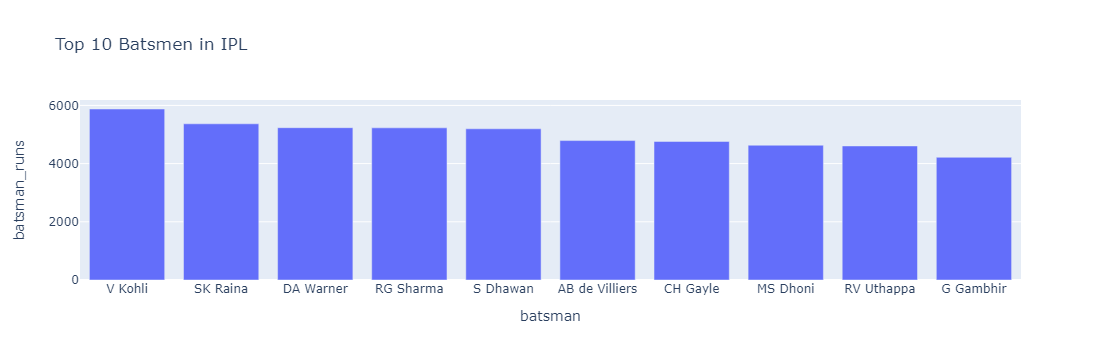

In [43]:

top_players = ball_by_ball.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
fig = px.bar(top_players, x=top_players.index, y='batsman_runs', title='Top 10 Batsmen in IPL')
fig.show()


## Insights

1. **Leading Scorers:** The chart suggests that V Kohli and SK Raina are among the top scorers in the IPL, indicating their consistency and skill in batting over multiple seasons of the tournament.

2. **Elite Group:** All the batsmen featured are elite players in the T20 format, as accumulating such a high number of runs requires consistent performance over many matches and seasons.

3. **Experience and Longevity:** These players have likely been part of the IPL for several years, which speaks to their experience, fitness, and ability to adapt to the evolving nature of the T20 game.



### Selecting relevant columns

In [5]:

ball_by_ball_relevant = ball_by_ball[['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler', 'batsman_runs', 'extra_runs', 
                                      'total_runs', 'is_wicket', 'batting_team', 'bowling_team']]

matches_relevant = matches[['id', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'venue']]

# Merging the dataframes
merged_df = pd.merge(ball_by_ball_relevant, matches_relevant, on='id')


In [6]:
merged_df

id  inning  over  ball      batsman  non_striker  \
0        335982       1     6     5   RT Ponting  BB McCullum   
1        335982       1     6     6  BB McCullum   RT Ponting   
2        335982       1     7     1  BB McCullum   RT Ponting   
3        335982       1     7     2  BB McCullum   RT Ponting   
4        335982       1     7     3   RT Ponting  BB McCullum   
...         ...     ...   ...   ...          ...          ...   
193271  1237181       1    12     5      RR Pant      SS Iyer   
193272  1237181       1    12     6      RR Pant      SS Iyer   
193273  1237181       1    13     1      RR Pant      SS Iyer   
193274  1237181       1    13     2      RR Pant      SS Iyer   
193275  1237181       1    13     3      SS Iyer      RR Pant   

                 bowler  batsman_runs  extra_runs  total_runs  is_wicket  \
0             AA Noffke             1           0           1          0   
1             AA Noffke             1           0           1          0   
2                Z Khan             0           0           0          0   
3                Z Khan             1           0           1          0   
4                Z Khan             1           0           1          0   
...                 ...           ...         ...         ...        ...   
193271  NM Coulter-Nile             0           0           0          0   
193272  NM Coulter-Nile             1           0           1          0   
193273        KH Pandya             0           1           1          0   
193274        KH Pandya             1           0           1          0   
193275        KH Pandya             1           0           1          0   

                 batting_team                 bowling_team        date  \
0       Kolkata Knight Riders  Royal Challengers Bangalore  2008-04-18   
1       Kolkata Knight Riders  Royal Challengers Bangalore  2008-04-18   
2       Kolkata Knight Riders  Royal Challengers Bangalore  2008-04-18   
3       Kolkata Knight Riders  Royal Challengers Bangalore  2008-04-18   
4       Kolkata Knight Riders  Royal Challengers Bangalore  2008-04-18   
...                       ...                          ...         ...   
193271         Delhi Capitals               Mumbai Indians  2020-11-10   
193272         Delhi Capitals               Mumbai Indians  2020-11-10   
193273         Delhi Capitals               Mumbai Indians  2020-11-10   
193274         Delhi Capitals               Mumbai Indians  2020-11-10   
193275         Delhi Capitals               Mumbai Indians  2020-11-10   

                              team1                  team2  \
0       Royal Challengers Bangalore  Kolkata Knight Riders   
1       Royal Challengers Bangalore  Kolkata Knight Riders   
2       Royal Challengers Bangalore  Kolkata Knight Riders   
3       Royal Challengers Bangalore  Kolkata Knight Riders   
4       Royal Challengers Bangalore  Kolkata Knight Riders   
...                             ...                    ...   
193271               Delhi Capitals         Mumbai Indians   
193272               Delhi Capitals         Mumbai Indians   
193273               Delhi Capitals         Mumbai Indians   
193274               Delhi Capitals         Mumbai Indians   
193275               Delhi Capitals         Mumbai Indians   

                        toss_winner toss_decision                 winner  \
0       Royal Challengers Bangalore         field  Kolkata Knight Riders   
1       Royal Challengers Bangalore         field  Kolkata Knight Riders   
2       Royal Challengers Bangalore         field  Kolkata Knight Riders   
3       Royal Challengers Bangalore         field  Kolkata Knight Riders   
4       Royal Challengers Bangalore         field  Kolkata Knight Riders   
...                             ...           ...                    ...   
193271               Delhi Capitals           bat         Mumbai Indians   
193272               Delhi Capitals           bat         Mumbai Indians   
1

###  Standardizing numeric columns

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import LabelEncoder

numeric_columns = ['over', 'ball', 'batsman_runs', 'extra_runs', 'total_runs']
scaler = StandardScaler()
merged_df[numeric_columns] = scaler.fit_transform(merged_df[numeric_columns])


### feature hashing

In [8]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()


In [9]:
# List of categorical columns to be label encoded
categorical_columns = ['batting_team', 'bowling_team', 'toss_winner', 'toss_decision', 'winner', 'venue', 'team2', 'team1','batsman',
                       'non_striker', 'bowler',]

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    merged_df[col] = label_encoder.fit_transform(merged_df[col])
    

In [10]:
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df['year'] = merged_df['date'].dt.year
merged_df['month'] = merged_df['date'].dt.month

merged_df.drop('date', axis=1, inplace=True)


In [11]:

merged_df

id  inning      over      ball  batsman  non_striker  bowler  \
0        335982       1 -0.559852  0.765931      396           77      18   
1        335982       1 -0.559852  1.319316       77          393      18   
2        335982       1 -0.383699 -1.447610       77          393     418   
3        335982       1 -0.383699 -0.894225       77          393     418   
4        335982       1 -0.383699 -0.340839      396           77     418   
...         ...     ...       ...       ...      ...          ...     ...   
193271  1237181       1  0.497069  0.765931      388          454     259   
193272  1237181       1  0.497069  1.319316      388          454     259   
193273  1237181       1  0.673222 -1.447610      388          454     182   
193274  1237181       1  0.673222 -0.894225      388          454     182   
193275  1237181       1  0.673222 -0.340839      458          385     182   

        batsman_runs  extra_runs  total_runs  ...  batting_team  bowling_team  \
0          -0.149141   -0.195254   -0.191779  ...             7            13   
1          -0.149141   -0.195254   -0.191779  ...             7            13   
2          -0.769938   -0.195254   -0.817254  ...             7            13   
3          -0.149141   -0.195254   -0.191779  ...             7            13   
4          -0.149141   -0.195254   -0.191779  ...             7            13   
...              ...         ...         ...  ...           ...           ...   
193271     -0.769938   -0.195254   -0.817254  ...             2             8   
193272     -0.149141   -0.195254   -0.191779  ...             2             8   
193273     -0.769938    2.746588   -0.191779  ...             2             8   
193274     -0.149141   -0.195254   -0.191779  ...             2             8   
193275     -0.149141   -0.195254   -0.191779  ...             2             8   

        team1  team2  toss_winner  toss_decision  winner  venue  year  month  
0          13      7           13              1       7     14  2008      4  
1          13      7           13              1       7     14  2008      4  
2          13      7           13              1       7     14  2008      4  
3          13      7           13              1       7     14  2008      4  
4          13      7           13              1       7     14  2008      4  
...       ...    ...          ...            ...     ...    ...   ...    ...  
193271      2      8            2              0       8      6  2020     11  
193272      2      8            2              0       8      6  2020     11  
193273      2      8            2              0       8      6  2020     11  
193274      2      8            2              0       8      6  2020     11  
193275      2      8            2              0       8      6  2020     11  

[193276 rows x 21 columns]

In [14]:
merged_df['winner'].value_counts()

winner
8     28884
0     25531
7     23358
13    21240
5     20904
10    19500
14    15718
3     15709
1      7013
2      4663
4      3063
9      2883
11     2383
6      1322
12     1105
Name: count, dtype: int64

In [17]:
X = merged_df.drop('winner',axis=1)

Y = merged_df['winner']

In [18]:
X

id  inning      over      ball  batsman  non_striker  bowler  \
0        335982       1 -0.559852  0.765931      396           77      18   
1        335982       1 -0.559852  1.319316       77          393      18   
2        335982       1 -0.383699 -1.447610       77          393     418   
3        335982       1 -0.383699 -0.894225       77          393     418   
4        335982       1 -0.383699 -0.340839      396           77     418   
...         ...     ...       ...       ...      ...          ...     ...   
193271  1237181       1  0.497069  0.765931      388          454     259   
193272  1237181       1  0.497069  1.319316      388          454     259   
193273  1237181       1  0.673222 -1.447610      388          454     182   
193274  1237181       1  0.673222 -0.894225      388          454     182   
193275  1237181       1  0.673222 -0.340839      458          385     182   

        batsman_runs  extra_runs  total_runs  is_wicket  batting_team  \
0          -0.149141   -0.195254   -0.191779          0             7   
1          -0.149141   -0.195254   -0.191779          0             7   
2          -0.769938   -0.195254   -0.817254          0             7   
3          -0.149141   -0.195254   -0.191779          0             7   
4          -0.149141   -0.195254   -0.191779          0             7   
...              ...         ...         ...        ...           ...   
193271     -0.769938   -0.195254   -0.817254          0             2   
193272     -0.149141   -0.195254   -0.191779          0             2   
193273     -0.769938    2.746588   -0.191779          0             2   
193274     -0.149141   -0.195254   -0.191779          0             2   
193275     -0.149141   -0.195254   -0.191779          0             2   

        bowling_team  team1  team2  toss_winner  toss_decision  venue  year  \
0                 13     13      7           13              1     14  2008   
1                 13     13      7           13              1     14  2008   
2                 13     13      7           13              1     14  2008   
3                 13     13      7           13              1     14  2008   
4                 13     13      7           13              1     14  2008   
...              ...    ...    ...          ...            ...    ...   ...   
193271             8      2      8            2              0      6  2020   
193272             8      2      8            2              0      6  2020   
193273             8      2      8            2              0      6  2020   
193274             8      2      8            2              0      6  2020   
193275             8      2      8            2              0      6  2020   

        month  
0           4  
1           4  
2           4  
3           4  
4           4  
...       ...  
193271     11  
193272     11  
193273     11  
193274     11  
193275     11  

[193276 rows x 20 columns]

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical

In [19]:
# Make sure y is one-hot encoded for multi-class classification
y = to_categorical(Y)

# Splitting the data
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [109]:


# Compute class weights for multi-class classification
class_weights = compute_class_weight('balanced', classes=np.unique(np.argmax(y_train, axis=1)), y=np.argmax(y_train, axis=1))
class_weights_dict = dict(enumerate(class_weights))

# Building the model for multi-class classification
model = Sequential([
    Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')  # Output layer for multi-class
])


C:\Users\joshu\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [112]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy',  # Changed to categorical_crossentropy
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])


In [113]:

# Train the model
history = model.fit(x_train, y_train, 
                    epochs=20, 
                    batch_size=32, 
                    validation_data=(x_val, y_val), 
                    class_weight=class_weights_dict, 
                    verbose=1)


Epoch 1/20
4832/4832 ━━━━━━━━━━━━━━━━━━━━ 288s 50ms/step - accuracy: 0.0744 - auc: 0.6149 - loss: 2.5802 - val_accuracy: 0.1072 - val_auc: 0.7013 - val_loss: 2.4118
Epoch 2/20
4832/4832 ━━━━━━━━━━━━━━━━━━━━ 265s 55ms/step - accuracy: 0.0818 - auc: 0.6778 - loss: 2.2020 - val_accuracy: 0.1023 - val_auc: 0.6841 - val_loss: 2.4601
Epoch 3/20
4832/4832 ━━━━━━━━━━━━━━━━━━━━ 284s 58ms/step - accuracy: 0.0797 - auc: 0.6759 - loss: 2.1987 - val_accuracy: 0.0830 - val_auc: 0.6687 - val_loss: 2.5028
Epoch 4/20
4832/4832 ━━━━━━━━━━━━━━━━━━━━ 240s 50ms/step - accuracy: 0.0752 - auc: 0.6690 - loss: 2.2038 - val_accuracy: 0.0875 - val_auc: 0.6538 - val_loss: 2.5530
Epoch 5/20
4832/4832 ━━━━━━━━━━━━━━━━━━━━ 392s 72ms/step - accuracy: 0.0689 - auc: 0.6525 - loss: 2.2625 - val_accuracy: 0.0329 - val_auc: 0.6090 - val_loss: 2.7560
Epoch 8/20
4832/4832 ━━━━━━━━━━━━━━━━━━━━ 279s 50ms/step - accuracy: 0.0718 - auc: 0.6595 - loss: 2.2409 - val_accuracy: 0.0379 - val_auc: 0.6031 - val_loss: 2.8600
Epoch 9/20

In [115]:
# Evaluate the model
print("Classification Report:")
y_pred = model.predict(x_val)

Classification Report:
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step


In [126]:
print("Classification Report:")
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Running classification report without specifying target_names
print(classification_report(y_true, y_pred_classes))


Classification Report:
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step


C:\Users\joshu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joshu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.15      0.21      0.18      5177
           1       0.00      0.00      0.00      1434
           2       0.00      0.00      0.00       945
           3       0.00      0.00      0.00      3121
           4       0.00      0.00      0.00       626
           5       0.00      0.00      0.00      4197
           6       0.00      0.00      0.00       267
           7       0.00      0.00      0.00      4683
           8       0.00      0.00      0.00      5723
           9       0.02      0.33      0.03       580
          10       0.00      0.00      0.00      3889
          11       0.00      0.00      0.00       478
          12       0.03      1.00      0.05       211
          13       0.00      0.00      0.00      4176
          14       0.10      0.09      0.09      3149

    accuracy                           0.05     38656
   macro avg       0.02      0.11      0.02     38656
weighted avg       0.03   

C:\Users\joshu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
